# Titanic Passenger Analysis

*By Tyler Julian   
Udacity Data Analyst Project 1*

**Updated 8/18/2017**

![picture alt](http://blog.nyhistory.org/wp-content/uploads/2012/04/Ships-Titanic-enhanced.jpg)

## Introduction

This analysis consists of importing a dataset in Python and working through the entire data analysis process: 

**Questions** 
* The process starts by asking questions about the dataset that seek to be answered.
* These questions are ultimately what need to be explored and answered by the end of the analysis.
    
    
**Data Wrangling**
* This phase is where missing values are dealt with and variables within the dataset are transformed into datatypes that are usable for test statistics and visualization.
* By the end of this phase, the dataset should be in a form that is ready for analysis.
    
    
**Exploration**
* Once the data is properly edited, each variable is investigated in detail. Deeper analysis is done to find answers and information about the original questions. 
* Visualizations and statistical tests are also performed to confirm the validity of findings and are used to communicate the results in the conclusion.
    
    
**Conclusion**
* Here, all of the major findings related to the originally posed questions are presented, along with the limitations to the project as well as any resources used for the analysis.  


## Navigation and Notes

The table of contents below features each section and can be used to navigate the project quckly.

The data used for this analysis is sample passenger data for the RMS Titanic. This data can be found at [this Kaggle webpage](https://www.kaggle.com/c/titanic/data).

This analysis is part of an evaluated project for the [Udacity Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002).

## Sections

1. Questions
  * [Intro](#Questions)
  * [Import Libraries and Data](#Import-Libraries-and-Data)
  * [First Glance into the Dataset](#First-Glance-into-the-Dataset)
2. Data Wrangling
  * [Intro](#Data-Wrangling)
  * [Checking for Missing Values](#Checking-for-Missing-Values)
  * [Handling Missing Values](#Handling-Missing-Values)
  * [Dropping Columns](#Dropping-Columns/Rows)   
  * [Transforming Columns](#Transforming-Columns/Rows)
  * [Result](#Result)
3. Exploration
  * [Intro](#Exploration)
  * [The Passengers](#The-Passengers)
  * [The Survivors](#The-Survivors)
  * Passenger/Survivor Comparison
    * [Intro](#Passengers-vs-Survivors)
    * [Gender](#Gender-Comparison)
    * [Age](#Age-Comparison)
    * [Social Class](#Social-Class-Comparison)
    * [Fare](#Fare-Comparison)
    * [Embarkation](#Embarkation-Comparison)
4. Conclusion
  * [Intro](#Conclusion)
  * [Review Questions](#Review-Questions)
  * [Findings](#Findings)
  * [Limitations](#Limitations)

## Questions

[[back to top]](#Introduction)

Every analysis starts by coming up with questions for exploration. The questions below will be revisited at the end of the project with the results from the analysis.

1. What did the surviving group look like and were there any possible correlations between the variables and surviving?
    2. Age:
        * Did children have the same or better chances of surviving compared to adults? What about older people?
    3.  Gender:
        * Were women prioritized for surviving over men, thus leading to a higher chance of survival?
    * Social Class:
        * What effects did social class have on one's chance of surviving?
    * Port Embarkation:
        * What ports had a larger percentage of their individuals survive?
    * Fare:
        * Did passengers that paid more for there ticket have a greater chance of surviving?

### Import Libraries and Data 

Before anything can be done, the dataset has to be loaded into Python. Different python packages and modules also need to be imported for use throughout the project.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

# Import data into a pandas dataframe
path = 'C:\Users\Tyler\Documents\python\project1'
with open(path + '\\titanic-data.csv', 'r') as file:
    titanic_df = pd.read_csv(file)

### First Glance into the Dataset

With the data loaded, a sample of entries can be generated:

In [2]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


***

By looking at a slice of the data, the user can get a better understanding of the variables in the dataset and determine whether the variables are suitable for analysis in their current form.

**Interesting points to note:**

* Some columns, such as "Age",  have missing values (NaNs). These values will need to be considered throughout the analysis in order to not misrepresent the data. Columns with NaN values will have to be revisited in the Data Wrangling phase and edited accordingly.
* Many columns have integers as values. Basic statistics can be easily extracted from these values with little to no editing. 
* The "Sex" and "Embark" columns currently consist of strings rather than integers. These columns will need to be transformed if any statistical correlation analysis or visualization is to be done. 
* The "Cabin" column seems to have a lot of NaNs, at least based off of this slice. This column might not be complete enough for rigorous analysis and could be removed, especially since "Cabin" is not one of the variables of interest in this project.

## Data Wrangling

[[back to top]](#Introduction)

With a preliminary look into the dataset now complete, the data needs to go through the Data Wrangling phase. The data has already been extracted. Now it needs to be prepped for analysis. This section will start by calculating, evaluating, and handling the missing values in each column. Variables that are not being explored in this project will also be dealt with. Certain columns' values will also be transformed so that they can be used later in the analysis. 

### Checking for Missing Values

As mentioned earlier, there were a couple of missing values (NaNs) in the dataset. Knowing which columns contain NaNs and their count will be helpful in determining whether any changes need to be made to utilize the data, or if the data will be usable at all.

In [3]:
# Using the built-in pandas function isnull(), the missing values in the dataset can be easily found.
NaN_counts = titanic_df.isnull().sum()

print(NaN_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# print out NaN count percentages
print("Age: {}".format(float(NaN_counts["Age"]) / titanic_df.shape[0]))
print("Cabin: {}".format(float(NaN_counts["Cabin"]) / titanic_df.shape[0]))
print("Embarked: {}".format(float(NaN_counts["Embarked"]) / titanic_df.shape[0]))

Age: 0.198653198653
Cabin: 0.771043771044
Embarked: 0.00224466891134


As can be seen from the outputs above, there are a few columns that have a significant amount of missing values. The "Age" column is missing roughly 20% of its values, while the "Cabin" column is missing over 75% of its values. "Embarked" only has two missing values in total.

### Handling Missing Values

Thus the questions arises: how will missing values be dealt with in this dataset?

* One option is to drop any column or rows with NaNs entirely. An issue with this method is that some good, usable data is also lost in the process.
* Another option would be to fill in the NaNs with a different value. However, for some columns (such as Age), this could prove quite problematic, as changing NaNs to a value such as 0 would directly influence the mean, median, and other important statistics of the data.
* The final option is to keep the NaNs entirely and make sure that any functions used on the data consider the missing values in their calculations.

The route this analysis will be taking to deal with missing values is a combination of two of the options:
1. The NaNs in the "Age" column will remain in the dataset. Removing the "Age" column or rows with NaN values would take away too much usable data. Instead, this analysis will perform statistics on the "Age" variable with missing values in mind.
2. The "Embarked" column will be investigated further to see if the records with the missing values have other variables with missing values. If there are multiple NaNs, the column will be dropped. If not, it will recieve the same treatment as the "Age" column.
3. The "Cabin" column is going to be dropped entirely, due to there being too much missing data.

### Dropping Columns/Rows

Since this analysis is not focused on the name, cabin, parentel/child relationships, siblings/spouse relationships, or the ticket information variables, they are dropped from the dataset.

In [5]:
titanic_df.drop("Cabin", inplace=True, axis=1)
titanic_df.drop("Name", inplace=True, axis=1)
titanic_df.drop("Ticket", inplace=True, axis=1)
titanic_df.drop("Parch", inplace=True, axis=1)
titanic_df.drop("SibSp", inplace=True, axis=1)

Although the "Age" column does contain a large amount of NaN values, a lot of other valuable data would be lost if the "Age" column was dropped entirely. As a result, this variable will remain unchanged.

However, further investigation of the records containing the "Embarked" NaN values is required to see if the two records should be dropped.

In [6]:
titanic_df[titanic_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
61,62,1,1,female,38.0,80.0,NaN
829,830,1,1,female,62.0,80.0,NaN


For both of these records, "Embarked" is the only variable that has any missing values. The rest of the data is still intact. As a result, these two records will not be dropped, because the rest of the data is still useful.

### Transforming Columns/Rows

Next, a few of the columns need to be transformed so that they can be used later in the project.

#### Gender
For the "Sex" column, each value is converted from a string to an integer. A key dictionary is also created that can be called if the user forgets what each integer represents.

In [7]:
# The replace() function is vary handy for quickly transforming values
titanic_df["Sex"] = titanic_df["Sex"].replace(["male", "female"], [0,1])
titanic_df["Sex"].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [8]:
# With this "key" in a Series, it can easily be called later when analysis is done on the Gender variable
gender_key = pd.Series([0, 1], index=["Male", "Female"])
print(gender_key)

Male      0
Female    1
dtype: int64


#### Embarked

In a similiar fashion, the "Embarked" data is also transformed into integer data and a key is generated.

In [9]:
titanic_df["Embarked"] = titanic_df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2]) 
titanic_df["Embarked"].head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [10]:
embark_key = pd.Series([0, 1, 2], index=["Southampton", "Cherbourg", "Queenstown"])
print(embark_key)

Southampton    0
Cherbourg      1
Queenstown     2
dtype: int64


### Result

With the data fully edited and transformed, the new data can be previewed:

In [11]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,0.0
1,2,1,1,1,38.0,71.2833,1.0
2,3,1,3,1,26.0,7.9250,0.0
3,4,1,1,1,35.0,53.1000,0.0
4,5,0,3,0,35.0,8.0500,0.0
5,6,0,3,0,NaN,8.4583,2.0
6,7,0,1,0,54.0,51.8625,0.0
7,8,0,3,0,2.0,21.0750,0.0
8,9,1,3,1,27.0,11.1333,0.0
9,10,1,2,1,14.0,30.0708,1.0


The data has now been properly edited for exploration.

## Exploration

[[back to top]](#Introduction)

Now that the data has been prepped for analysis, experimentation and exploration of the data can begin.

The Exploration phase will start by exploring each of the variables of interest (Gender, Age, Social Class, Fare, and Embarkation) to get a better picture of what the passengers looked like. The same procedures will also be done for the survivors of the Titanic. The passenger's and survivor's variables will then be compared against each other in order to answer the questions posed at the start of the project.

### The Passengers

[[back to top]](#Introduction)

#### Total Passengers

The best place to start is to calculate how many total passengers are in the dataset. 

In [12]:
passenger_count = titanic_df["PassengerId"].count()
print(passenger_count)

891


After a short line of code, we find that the total number was 891. This is smaller than the [actual passenger count onboard the Titanic, which was 1,317](https://en.wikipedia.org/wiki/RMS_Titanic#Passengers). This suggests that the current dataset is a sample of Titanic passenger population.

#### Gender 

Next we move on to gender. The expectation would be approximately a 1:1 ratio, since this is most common distribution for gender in most populations. 

The results will be displayed as percentages of all passengers in the dataset.

In [13]:
# The value_counts() function will be used again in the Social Class and Embarkation sections to find the percentages
gender_stat = 100 * titanic_df['Sex'].value_counts() / titanic_df.shape[0]
print(gender_stat)

0    64.758698
1    35.241302
Name: Sex, dtype: float64


Interestingly, there are almost two times as many men than women passengers in this sample.

#### Age

For age, the minimum and maximum values, the median, and the standard deviation are calculated.

In [14]:
age_stat = titanic_df["Age"].describe()
print(age_stat)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


The age of the passengers ranges from a 5 month old to child to an 80 year old adult. The median is 28 with a standard deviation of ~14.53 years.

The values can also be plotted to a histogram to get a better sense of data's shape.

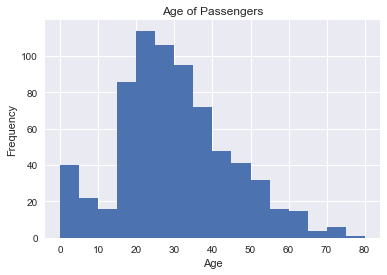

In [15]:
titanic_df["Age"].plot(kind="hist",
                       bins=16, 
                       range=(0, titanic_df["Age"].max()),
                       title="Age of Passengers")
plt.xlabel("Age")

The histogram shows that there is a small peak at the 0-5 year old children in the sample. The frequency then drops for the 10-15 year olds and spikes again as the values get closer to the median. From there, the distribution has a downward trend as the individuals get older.

#### Social Class

Each social class from the dataset is sorted and compared as parts of a whole. A possible prediction might be that the total amount of passengers for each class would follow a pattern, where the lower classes have the highest amount of passengers and the upper classes have the lowest amount of passengers.

The results will be displayed as percentages of all passengers in the dataset.

A key is also generated from [source page of the dataset](https://www.kaggle.com/c/titanic/data) so each value has an assigned class.

In [16]:
social_class_key = pd.Series([1,2,3], index= ["Upper", "Middle", "Lower"])
print(social_class_key)

Upper     1
Middle    2
Lower     3
dtype: int64


In [17]:
social_class_stat = 100 * titanic_df["Pclass"].value_counts(sort=False) / titanic_df.shape[0]
print(social_class_stat)

1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64


The lower class does end up accounting for a  little over half of the passengers, with the rest being in the middle and upper class. There are actually more in the upper class than in the middle class, contrary to the original prediction. This might be attributable to the fact that [there were more upper class rooms than middle class rooms available on the Titanic](https://en.wikipedia.org/wiki/RMS_Titanic#Passengers).

#### Fare

Similiar to age, we are going to look at the minimum, maximum, median, and standard deviation of the fares for the passengers.

It is important to consider that the currency is not explicitly mentioned in the data's origins, but it is probably [the old British currency system of pounds, shillings, and pence.](https://en.wikipedia.org/wiki/%C2%A3sd) 

In [18]:
fare_stat = titanic_df["Fare"].describe()
print(fare_stat)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


This might be the first instance where there is an outlier in the data. The maximum value for fare is way above both the median and the 75th percentile. 

By visualizing this data in a histogram, this theory can be explored.

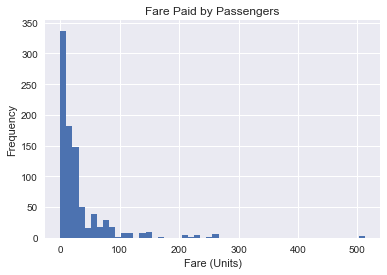

In [19]:
titanic_df["Fare"].plot(kind="hist",
                        bins=50,
                        range=(0,titanic_df["Fare"].max()),
                        title="Fare Paid by Passengers")
plt.xlabel("Fare (Units)")

As suspected, the maximum value is indeed an outlier. The majority of the values are concentrated between 0 and 100, with the frequency rapidly decreasing as the fare increases.

#### Embarkation

Similiar to the social classes, the embarkation ports are sorted from the dataset and compared as parts of a whole.

In [20]:
## Called the key here in order to read the statistics output below
embark_key

Southampton    0
Cherbourg      1
Queenstown     2
dtype: int64

In [21]:
embark_stat = 100 * titanic_df["Embarked"].value_counts(sort=False) / titanic_df.shape[0]
print(embark_stat)

0.0    72.278339
1.0    18.855219
2.0     8.641975
Name: Embarked, dtype: float64


Southampton is where the majority of the passengers originated, followed by Cherbourg and then Queenstown. This make sense considering that [Southampton was Titanic's original launching port](https://en.wikipedia.org/wiki/RMS_Titanic#Collecting_passengers).

### The Survivors

[[back to top]](#Introduction)

With the general investigation of the passenger data now complete, the focus will move on toward looking at the survivors, a subset of the original dataset. The same variables and procedures that was used for the "[The Passengers](#The-Passengers)" section will also be used here.

To start, a new dataframe consisting of only the survivors will be created.

In [22]:
# Create survivor only dataframe
survivor_df = titanic_df[titanic_df['Survived'] > 0]

#### Total percentage of people that survived

Next, the total survivor count will be calculated.

In [23]:
survivor_mean = titanic_df['Survived'].mean()
survivor_count = survivor_df.shape[0]

print(('{} out of {} survived, or {}%.').format(survivor_count, passenger_count, round(survivor_mean*100, 1)))

342 out of 891 survived, or 38.4%.


Of the 891 passengers onboard the Titanic in this sample, only 342 survived, or about 38.4%.

#### Gender

In [24]:
gender_key

Male      0
Female    1
dtype: int64

In [25]:
survivor_gender_stat = 100 * survivor_df['Sex'].value_counts(sort=False) / survivor_df.shape[0]
print(survivor_gender_stat)

0    31.871345
1    68.128655
Name: Sex, dtype: float64


For the survivor subset, females actually make up the majority, completely opposite to the gender distribution of the passengers.

#### Age

In [26]:
survivor_age_stat = survivor_df["Age"].describe()
print(survivor_age_stat)

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


At first glance, the age stats for the survivor subgroup appear to be very similiar to that of the passengers. 

Visualizing the survivor data may show if their is any variation between the two datasets.

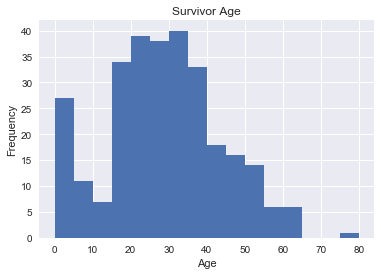

In [27]:
survivor_df["Age"].plot(kind='hist',
                        bins=16,
                        range=(0,survivor_df["Age"].max()),
                        title="Survivor Age")
plt.xlabel("Age")

For the most part,  the shape of the histogram remains consistent. However, the first peak for the 0-5 year olds is more pronounced in the survivor set than in the passenger set.

#### Social Class

In [28]:
social_class_key

Upper     1
Middle    2
Lower     3
dtype: int64

In [29]:
survivor_social_class_stat = 100 * survivor_df['Pclass'].value_counts(sort=False) / survivor_df.shape[0]
print(survivor_social_class_stat)

1    39.766082
2    25.438596
3    34.795322
Name: Pclass, dtype: float64


The survivor set contains a much higher percentage of individuals belonging to the upper class. This is in stark contrast to the passenger data, where the lower class was the majority. Now, the lower class account for slightly less survivors than the upper class, and and has drawn closer to the middle class percentage.

#### Fare

In [30]:
survivor_fare_stat = survivor_df["Fare"].describe()
print(survivor_fare_stat)

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


The minimum and maximum fare rate for the survivor set is identical to the minimum and maximum for the passenger set. The median  has increased though, as has the standard deviation.

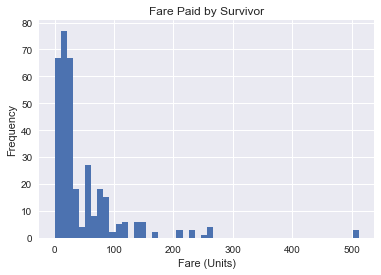

In [31]:
survivor_fare_hist = survivor_df["Fare"].plot(kind='hist',
                                              bins=50,
                                              range=(0,survivor_df["Fare"].max()),
                                              title="Fare Paid by Survivor")
survivor_fare_hist.set_xlabel("Fare (Units)")

Once plotted, the histogram shows that the shape is very simliar to that of the passenger set.

#### Embarkation

In [32]:
embark_key

Southampton    0
Cherbourg      1
Queenstown     2
dtype: int64

In [33]:
survivor_embark_stat = 100 * survivor_df['Embarked'].value_counts() / survivor_df.shape[0]
print(survivor_embark_stat)

0.0    63.450292
1.0    27.192982
2.0     8.771930
Name: Embarked, dtype: float64


In the survivor set, Cherbourg still accounted for the greatest proportion of the individuals, same as the passenger data. Cherbourg's percentage increased slightly in the survivor data, and Queenstown remained relatively the same.

### Passengers vs Survivors

[[back to top]](#Introduction)

With descriptive statistics now calculated for both the passengers and the survivor subset, comparison analysis and statistical tests can be run between these two groups. This section will work through each variable one at a time, with the analysis focused on answering the questions posed at the start of the project. 

#### Gender Comparison

In [34]:
gender_key

Male      0
Female    1
dtype: int64

In [35]:
print("Passengers:")
print(gender_stat)

print("\nSurvivors:")
print(survivor_gender_stat)

gender_stat_diff = survivor_gender_stat - gender_stat

print("\nSurvivor Difference:")
print(gender_stat_diff)

Passengers:
0    64.758698
1    35.241302
Name: Sex, dtype: float64

Survivors:
0    31.871345
1    68.128655
Name: Sex, dtype: float64

Survivor Difference:
0   -32.887353
1    32.887353
Name: Sex, dtype: float64


As mentioned in the Survivors section, the male and female percentages are complete opposites between the passenger set and the survivor set.

This be be more clearly seen in a double bar graph:

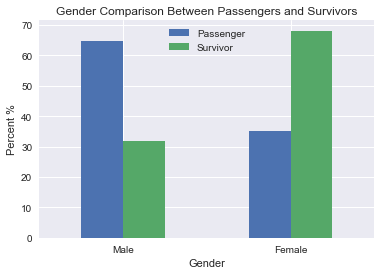

In [36]:
gender_df = pd.DataFrame({"Passenger":gender_stat,
                          "Survivor":survivor_gender_stat},
                        columns=["Passenger", "Survivor"])

gender_df.plot(kind="bar", title="Gender Comparison Between Passengers and Survivors") \
    .set_xticklabels(["Male", "Female"], rotation='horizontal')
plt.ylabel("Percent %")
plt.xlabel("Gender")

***

Or in a positive-negative bar plot:



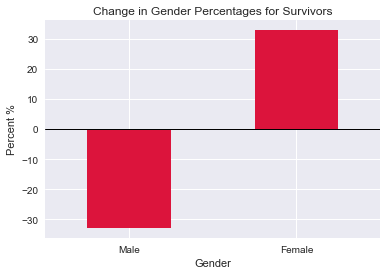

In [37]:
gender_stat_diff.plot(kind="bar", 
                      color="crimson",
                      title="Change in Gender Percentages for Survivors") \
    .set_xticklabels(["Male", "Female"], rotation='horizontal'); plt.axhline(color="black", lw=1)
plt.ylabel("Percent %")
plt.xlabel("Gender")

Both of these graphs clearly show that the male and female percentages were flipped for the survivors.

***

However, just because the graphs seem to show that surviving is dependent upon whether you were a male of a female, it does not *statistically* prove it to be fact. In order to provide evidence that the two variables are not independent, a chi-squared test must be done.

[This site](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html) was extremely helpful in my understanding and implementation of the chi-squared test of independence on these variables.

The process starts by creating a frequency table of those who died and survived for both males and females.

In [38]:
# Collecting variables to be used in the chi-squared test
male_count = titanic_df["Sex"][titanic_df["Sex"] == 0].count()
female_count = titanic_df["Sex"][titanic_df["Sex"] == 1].count()
survivor_male_count = survivor_df["Sex"][survivor_df["Sex"] == 0].count()
survivor_female_count = survivor_df["Sex"][survivor_df["Sex"] == 1].count()
death_male_count = male_count-survivor_male_count
death_female_count = female_count-survivor_female_count

# I built the table manually in a numpy array so that I could seemlessly transfer it over to a pandas DataFrame
gender_np = np.array([[survivor_male_count, death_male_count, male_count],
                     [survivor_female_count, death_female_count, female_count],
                     [survivor_count, (death_male_count + death_female_count), passenger_count]])

In [39]:
# The array is converted to a DataFrame...
gender_tab = pd.DataFrame(gender_np, 
                         columns=["Survived", "Died", "Row_totals"],
                         index=["Male", "Female", "Col_totals"])

# ... and printed to ensure it is correct.
gender_tab.head()

,Survived,Died,Row_totals
Male,109,468,577
Female,233,81,314
Col_totals,342,549,891


Once the data has been collected and put into a dataframe, the ["chi2_continency()" method](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) from the scipy.stats package can be used to calculate a p-value for the observed dataframe.

In [40]:
# Using .iloc, only the frequecies are selected, not the totals.
gender_observed = gender_tab.iloc[0:2,0:2]

stats.chi2_contingency(observed= gender_observed)

(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

With a p-value of < 0.01, we reject the null hypothesis that the two varibles of surviving and gender are independent, and that they are in fact correlated.  

#### Age Comparison

In [41]:
print("Passengers:")
print(age_stat)

print("\nSurvivors:")
print(survivor_age_stat)

Passengers:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Survivors:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


At first glance, there does not appear to be many differences between the survivor and passenger datasets.

Visualizing the shape of the two datasets together can be done with a step histogram:

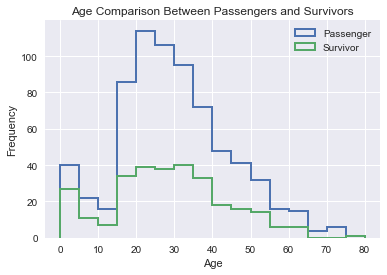

In [42]:
age_df = pd.DataFrame({"Passenger":titanic_df["Age"],
                       "Survivor":survivor_df["Age"]},
                      columns= ["Passenger",
                              "Survivor"])

age_df.plot(kind='hist', 
            bins=16,
            range=(0,80), 
            histtype="step",
            lw=2,
            title="Age Comparison Between Passengers and Survivors")
plt.xlabel("Age")

For the most part, both datasets follow a very similar shape. However, the 20-30 year old peak on the survivor data is much shallower than on the passenger data. The 0-5 year old peak also maintains most of its height in the survivor group. 

The two datasets can also be compared using boxplots:

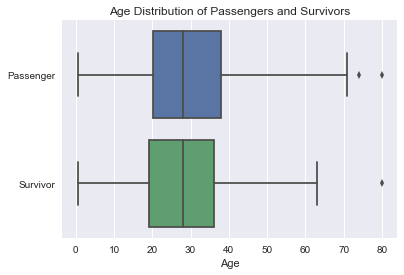

In [43]:
sns.boxplot(data=age_df, orient="h", whis=2)
plt.xlabel("Age")
plt.title("Age Distribution of Passengers and Survivors")

The box plots tell a similiar story when it comes to the distribution of the two sets. For the most part, they are similiar.

So what conclusions can be drawn about someone's age and their chances of survival? Although some minor differences were mentioned for the step histogram, it can be difficult to determine whether these differences are significant, or just due to chance. Perhaps some deeper analysis can be done on these points in a future study.

#### Social Class Comparison

In [44]:
social_class_key

Upper     1
Middle    2
Lower     3
dtype: int64

In [45]:
print("Passengers:")
print(social_class_stat)

print("\nSurvivors:")
print(survivor_social_class_stat)

social_class_stat_diff = survivor_social_class_stat - social_class_stat

print("\nSurvivor Difference:")
print(social_class_stat_diff)

Passengers:
1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64

Survivors:
1    39.766082
2    25.438596
3    34.795322
Name: Pclass, dtype: float64

Survivor Difference:
1    15.523658
2     4.787643
3   -20.311300
Name: Pclass, dtype: float64


The upper and lower class percentages vastly change from the passenger set to the survivor set, with the upper class accounting for almost 15% more of the survivors than of the passengers. They represented ~24% of the individuals in the passenger set, but represented ~40% of individuals in the survivor set. The opposite can be said for the lower class, which made up 55% of the original passengers, but only accounted for 34% of the survivors. The middle class percentage went up slightly.

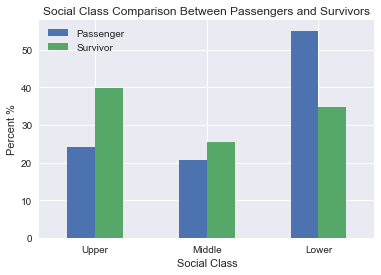

In [46]:
social_class_df = pd.DataFrame({"Passenger":social_class_stat,
                                "Survivor":survivor_social_class_stat},
                               columns=["Passenger", "Survivor"])

social_class_df.plot(kind="bar",
                     title="Social Class Comparison Between Passengers and Survivors") \
    .set_xticklabels(["Upper", "Middle", "Lower"], rotation='horizontal')
plt.ylabel("Percent %")
plt.xlabel("Social Class")

Visualized in a double bar graph, the change between the upper and lower class between passengers and survivors is made even more evident.

However, one of the better ways to visualize this change might be with a negative-positve bar graph:

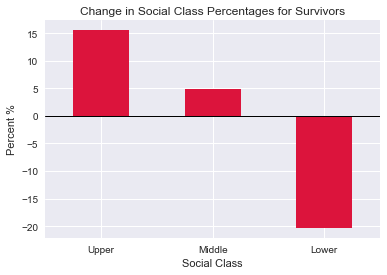

In [47]:
social_class_stat_diff.plot(kind="bar", 
                            color="crimson", 
                            title="Change in Social Class Percentages for Survivors") \
    .set_xticklabels(["Upper", "Middle", "Lower"], rotation='horizontal'); plt.axhline(color="black", lw=1)
plt.ylabel("Percent %")
plt.xlabel("Social Class")

Based on the substantial change in social class distribution from the passengers to the survivors, it could be plausible that the individuals in the upper class had priority in getting onto a lifeboat, thus increasing their chances of survival and making them larger portion of the survivor dataset. The poor, though many in number, may have had less priority, thus lessening their chances of surviving.

#### Fare Comparison

In [48]:
print("Passengers:")
print(fare_stat)

print("\nSurvivors:")
print(survivor_fare_stat)

Passengers:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Survivors:
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


The maximum and minimum fares are the same between sets, but the median and standard deviation on the survivor set is higher.

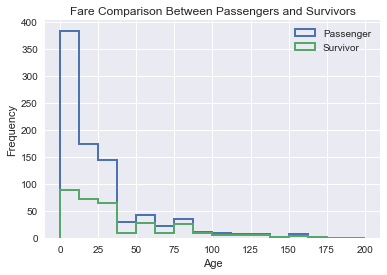

In [49]:
fare_df = pd.DataFrame({"Passenger":titanic_df["Fare"],
                       "Survivor":survivor_df["Fare"]},
                      columns= ["Passenger",
                              "Survivor"])

fare_df.plot(kind='hist', 
             bins=16,
             range=(0,200),
             histtype="step",
             lw=2,
             title="Fare Comparison Between Passengers and Survivors")
plt.xlabel("Age")

Visualized as a step histogram, the shape of the two sets are mostly the same, except for the frequency of fares less than 15. They are much higher for the passenger set compared to the survivor set.

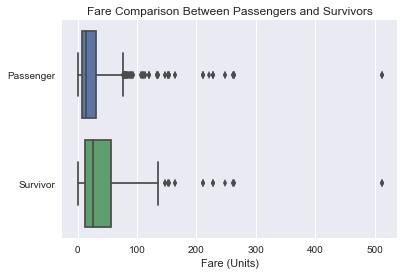

In [50]:
sns.boxplot(data=fare_df, orient="h",whis=2).set_title("Fare Comparison Between Passengers and Survivors")
plt.xlabel("Fare (Units)")

A boxplot visualiation does not show this difference. However, it does show the effect of the higher median and standard deviation of the survivor set. 

Does this data provide evidence that higher fares results in a better chance of surviving? While the data does show that the survivor group's fare was an average slightly higher, it is possible that this was due to chance. There is also the consideration that the "Fare" stat is not well documented from the original source. There is no evidence if to suggest how the fare is split between families, parties, or couples. Does one person pay and the other have a fare of zero? These limitations severly restrict the amount of experimentation that can be done and the validity of the conclusions made.

#### Embarkation Comparison

In [51]:
print("Passengers:")
print(embark_stat)

print("\nSurvivors:")
print(survivor_embark_stat)

embark_stat_diff = survivor_embark_stat - embark_stat

print("\nSurvivor Difference:")
print(embark_stat_diff)

Passengers:
0.0    72.278339
1.0    18.855219
2.0     8.641975
Name: Embarked, dtype: float64

Survivors:
0.0    63.450292
1.0    27.192982
2.0     8.771930
Name: Embarked, dtype: float64

Survivor Difference:
0.0   -8.828047
1.0    8.337764
2.0    0.129955
Name: Embarked, dtype: float64


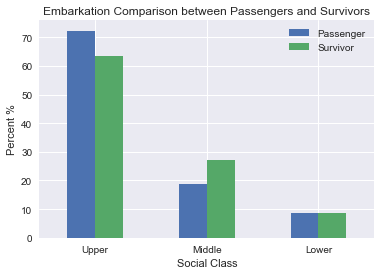

In [52]:
embark_df = pd.DataFrame({"Passenger":embark_stat,
                          "Survivor":survivor_embark_stat},
                               columns=["Passenger", "Survivor"])

embark_df.plot(kind="bar", 
               title="Embarkation Comparison between Passengers and Survivors") \
    .set_xticklabels(["Upper", "Middle", "Lower"], rotation='horizontal')
plt.ylabel("Percent %")
plt.xlabel("Social Class")

The double bar graph above and the negative-postive bar graph below both further display the minute differences between the groups.

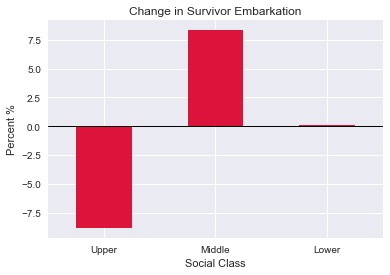

In [53]:
embark_stat_diff.plot(kind="bar", 
                      color="crimson", 
                      title="Change in Survivor Embarkation") \
    .set_xticklabels(["Upper", "Middle", "Lower"], rotation='horizontal'); plt.axhline(color="black", lw=1)
plt.ylabel("Percent %")
plt.xlabel("Social Class")

## Conclusion

[[back to top]](#Introduction)

### Review Questions

1. What did the surviving group look like and were there any possible correlations between the variables and surviving?
    2. Age:
        * Were there specific age groups that had better chances of survival? Children? Older individuals?
    3.  Gender:
        * Were women prioritized for surviving over men, thus leading to a higher chance of survival?
    * Social Class:
        * What effects did social class have on one's chance of surviving?
    * Port Embarkation:
        * What ports had a larger percentage of their individuals survive?
    * Fare:
        * Did passengers that paid more for their ticket have a greater chance of surviving?

### Findings

**General**

* Of the 891 passengers in this dataset, only 342 survived, or about 38.4%.
* There were more men than women onboard, with women only accounting for ~35% of the total passenger count.
* Age varied on the Titanic, from several months old to 80 years old. The average person was in their late 20s.
* The average fare to board the Titanic was ~14.50 units of currency. One individual spent over 510 units.
* Most passengers, about 72%, boarded the Titanic at Southampton, the ship's departure port.
* The ship featured individuals from all social classes, but the majority were from the lower class.
* Of those that survived, a majority of them were women, of the upper class, and from Southampton.

***

**Were there specific age groups that had better chances of survival? Children? Older individuals?**

Inital results suggest that the chances of survival were relatively the same for all ages. The shape of the survivor distribution was very similar to that of the passenger set, as can be seen below. Some future exploration can be specifically done with the younger ages, as there may be some significant differences between that group and the rest of the "Age" values.

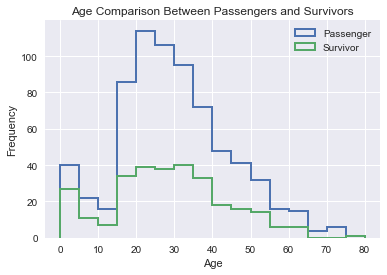

In [54]:
age_df.plot(kind='hist', 
            bins=16,
            range=(0,80), 
            histtype="step", 
            lw=2,
            title="Age Comparison Between Passengers and Survivors")
plt.xlabel("Age")

***

**Were women prioritized for surviving over men, thus leading to a higher chance of survival?**

Based on a chi-squared test, gender and survival were not considered independent of each other and thus are correlated. The data shows that the majority of survivors were women, completely opposite to the demographics of the passengers before the ship crashed.

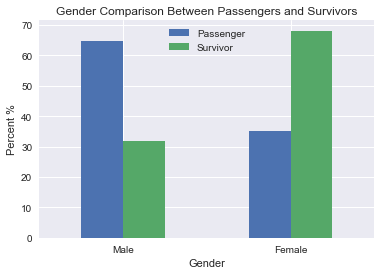

In [55]:
gender_df.plot(kind="bar", title="Gender Comparison Between Passengers and Survivors") \
    .set_xticklabels(["Male", "Female"], rotation='horizontal')
plt.ylabel("Percent %")
plt.xlabel("Gender")

***

**What effects did social class have on one's chance of surviving?**

People in the lower class appear to have had a much lower chance of surviving than the upper class did. The surviving group had a higher percentage of upper class individuals, even though the lower class was the majority of the passengers before the ship crashed.

Perhaps the upper class were given priority for getting onto the lifeboats because of their social status? Or perhaps the majority of the upper class were female, thus having a greater possibilty of surviving because of their gender rather than their class? On the flip side, maybe the lower class was made mostly of men? More investigation is required to statistically prove that surviving is correlated with social class.

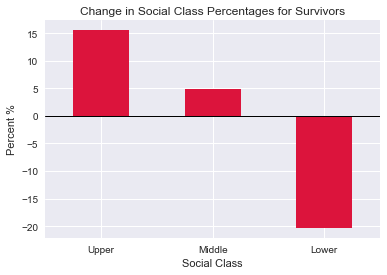

In [56]:
social_class_stat_diff.plot(kind="bar", 
                            color="crimson", 
                            title="Change in Social Class Percentages for Survivors") \
    .set_xticklabels(["Upper","Middle", "Lower"], rotation='horizontal'); plt.axhline(color="black", lw=1)
plt.ylabel("Percent %")
plt.xlabel("Social Class")

***

**What ports had a larger percentage of their individuals survive?**

Although the percentage of individuals from Southampton dropped between the passenger group and the survivors, Southampton still accounted for the largest percentage of those who survived the Titanic at ~64%. There does not appear to be any major differences between the passengers and the survivors.

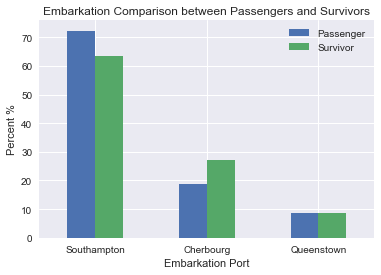

In [57]:
embark_df.plot(kind="bar", 
               title="Embarkation Comparison between Passengers and Survivors") \
    .set_xticklabels(["Southampton", "Cherbourg", "Queenstown"], rotation='horizontal')
plt.xlabel("Embarkation Port")
plt.ylabel("Percent %")

***

**Did passengers that paid more for their ticket have a greater chance of surviving?**

There did not appear to be any major differences between the fare data for survivors or passengers, but these conclusions should be taken lightly. There are several problems with the values of this variables that could introduct a lot interference with the results. Although the median was a bit higher in the survivor group, this could be due to chance, and may not be significant enough to show that they are correlated. 

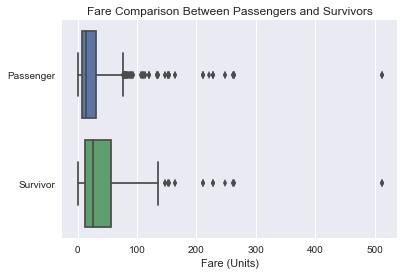

In [58]:
sns.boxplot(data=fare_df, orient="h",whis=2).set_title("Fare Comparison Between Passengers and Survivors")
plt.xlabel("Fare (Units)")

### Limitations

No dataset or analysis is ever perfect, including this one. It is important to consider all of the limitations of an analysis in order to have a proper understanding of the applicability of the conclusions.

**Missing values**
   * From the Data Wrangling section, it was clear that some variables, such as Age and Cabin, were missing a bunch of valuable data from the sample. It is important to consider that the "Age" data that was explored in this analysis may not have provided the full picture, especially if the missing age records were systematically lost due to some unknown variables.
    
**Lack of details for the fare data**
   * This variable is very tricky to draw conclusions from because of the lack of information about the variable. There is no documentation on how fares were calculated between familes, parties, and couples. What if children were admitted for free under a certain age? None of these details were included in the data, thus making the conclusions that were made about this variable limited.
   
**The dataset is a sample of the larger Titanic passenger population**
   * As mentioned earlier in the analysis, the dataset used in this project is only a piece of the greater Titanic population. Because of this, the analysis may be missing some crucial pieces of the puzzle. What if the the rest of the population that was missing for the sample had died (which is why the data couldn't be collected)? This information would drastically change the survival percentages, and thus the conclusions that were made from them as well.
   
**Not all conclusions were validated by rigorous statistics tests**
   * Some of the findings in these project can not be taken as statistically proven,  no matter how convincing the argument may seem. The only finding that was substantiated statistically was the correlation between gender and survival, which was validated by the chi-squared test

### Resources

[[back to top]](#Introduction)
* Webpage
    * [Titanic Wiki](https://en.wikipedia.org/wiki/RMS_Titanic)   
* Documentation
    * [matplotlib Documentation](http://matplotlib.org/) 
    * [pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
    * [seaborn Documentation](https://seaborn.pydata.org/)   
* Blog/Forums
    * [Blog Post on using Chi-Square in Python](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html)   
    * [Box Plot flier fix for seaborn](https://stackoverflow.com/questions/28908003/matplotlib-box-plot-fliers-not-showing)   
    * [Help on assigning seaborn labels](https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot)   